##### Exercise 1 : Calculate Confidence Interval for Sample Data

Sample Mean: 49.41
Sample Standard Deviation: 10.30
Sample Size: 1000
95% Confidence Interval: (48.77, 50.05)


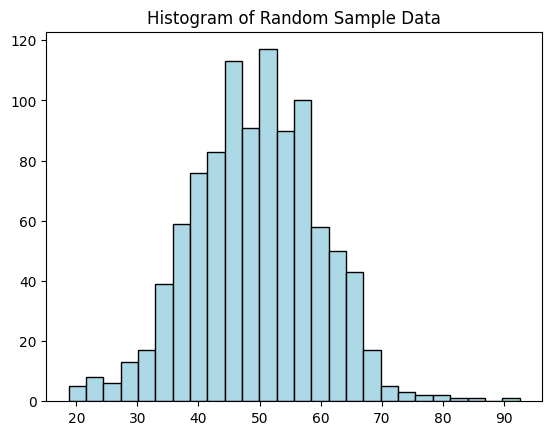

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# generate random sample data
data = np.random.normal(loc=50, scale=10, size=1000)

# sample statistics
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

# show sample statistics
print(f"Sample Mean: {mean:.2f}")
print(f"Sample Standard Deviation: {std:.2f}")   
print(f"Sample Size: {n}")

# 95% confidence interval
z_value = norm.ppf(0.975)
margin_of_error = z_value * (std / np.sqrt(n))
ci= (mean - margin_of_error, mean + margin_of_error)

print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")

# show histogram of the data
plt.hist(data, bins='auto', color='lightblue', edgecolor='black')
plt.title('Histogram of Random Sample Data')
plt.show()


##### Exercise 2 : Conduct Sampling and Create a Report

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

import pandas as pd
from scipy.stats import norm
import numpy as np

# load dataset
df = pd.read_csv(url)

# sampling
sample = df['sepal_length'].sample(30, random_state=42)

# sample statistics
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
n = len(sample)

# show sample statistics
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")   
print(f"Sample Size: {n}")

# 95% confidence interval
z_value = norm.ppf(0.975)
margin_of_error = z_value * (sample_std / np.sqrt(n))
ci= (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")

Sample Mean: 5.98
Sample Standard Deviation: 0.85
Sample Size: 30
95% Confidence Interval: (5.68, 6.28)


##### Additional Practice : Create confidence intervals for other statistics

In [11]:
import numpy as np
import scipy.stats as stats
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

df = pd.read_csv(url)

# sampling
sample = df['sepal_length'].sample(20, random_state=42)

# sample statistics
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
n = len(sample)

# t-distribution untuk 95% CI
t_value = stats.t.ppf(0.975, df=n-1)

# Margin of error
margin = t_value * sample_std / np.sqrt(n)

# Confidence interval
ci = (sample_mean - margin, sample_mean + margin)

# show sample statistics
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")   
print(f"Sample Size: {n}")

print(f"95% Confidence Interval for Sepal Length Mean: ({ci[0]:.2f}, {ci[1]:.2f})")

Sample Mean: 5.97
Sample Standard Deviation: 0.72
Sample Size: 20
95% Confidence Interval for Sepal Length Mean: (5.64, 6.31)


##### Additional Practice : Perform stratified sampling and compare intervals across strata

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import t

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
# load data
df = pd.read_csv(url)

# misal kita ambil 10 sampel per species (stratum)
sample_setosa = df[df['species']=='setosa']['sepal_length'].sample(10, random_state=1)
sample_versicolor = df[df['species']=='versicolor']['sepal_length'].sample(10, random_state=1)
sample_virginica = df[df['species']=='virginica']['sepal_length'].sample(10, random_state=1)

# buat fungsi untuk menghitung CI
def ci_95(sample):
    mean = sample.mean()
    std = sample.std(ddof=1)
    n = len(sample)
    t_value = t.ppf(0.975, df=n-1)
    margin = t_value * std / np.sqrt(n)
    return (mean - margin, mean + margin)

# hitung CI untuk tiap strata
ci_setosa = ci_95(sample_setosa)
ci_versicolor = ci_95(sample_versicolor)
ci_virginica = ci_95(sample_virginica)

print("95% CI per species:")
print(f"Setosa: {ci_setosa}")
print(f"Versicolor: {ci_versicolor}")
print(f"Virginica: {ci_virginica}")


95% CI per species:
Setosa: (4.705879180089714, 5.174120819910287)
Versicolor: (5.415614141022267, 6.224385858977733)
Virginica: (6.258707237088559, 7.241292762911441)


##### Additional Practice : Visualize confidence intervals for mutiple samples using Matplotlib

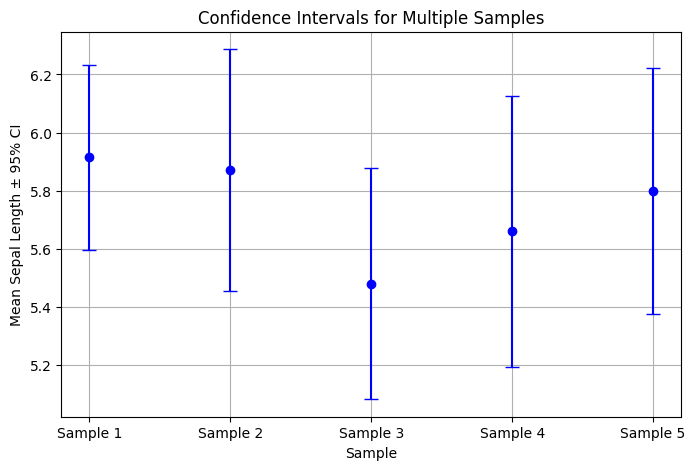

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

# load data
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# misal kita ambil 5 sampel acak berbeda dari sepal_length
np.random.seed(42)
samples = [df['sepal_length'].sample(20, random_state=i) for i in range(5)]

# hitung mean dan margin of error tiap sampel
means = []
errors = []

for sample in samples:
    mean = sample.mean()
    std = sample.std(ddof=1)
    n = len(sample)
    t_value = t.ppf(0.975, df=n-1)
    margin = t_value * std / np.sqrt(n)
    
    means.append(mean)
    errors.append(margin)

# plot menggunakan error bars
plt.figure(figsize=(8,5))
plt.errorbar(x=range(1, 6), y=means, yerr=errors, fmt='o', capsize=5, color='blue')
plt.xticks(range(1,6), [f"Sample {i}" for i in range(1,6)])
plt.xlabel("Sample")
plt.ylabel("Mean Sepal Length ± 95% CI")
plt.title("Confidence Intervals for Multiple Samples")
plt.grid(True)
plt.show()
